In [1]:
# https://www.rdkit.org/
import rdkit
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
#from mordred import Calculator, descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider

In [4]:
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result

In [5]:
name1 = "CCC#C"
m1 = Chem.MolFromSmiles(name1)
name2 = "CC#CC"
m2 = Chem.MolFromSmiles(name2)

# Inspect Bit with Image

In [66]:
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint

mol1 = Chem.MolFromSmiles('C=C')
mol2 = Chem.MolFromSmiles('C#C')
mol3 = Chem.MolFromSmiles('C=CC#CC=CC#C')
bit_info1 = {}
bit_info2 = {}
bit_info3 = {}
fp1 = GetHashedMorganFingerprint(mol1, 3, bitInfo=bit_info1, useFeatures=True)
fp2 = GetHashedMorganFingerprint(mol2, 3, bitInfo=bit_info2, useFeatures=True)
fp3 = GetHashedMorganFingerprint(mol3, 3, bitInfo=bit_info3, useFeatures=True)

In [67]:
print(get_index_of_array_that_contain_1_in_any_position(list(fp1)))
print(get_index_of_array_that_contain_1_in_any_position(list(fp2)))
print(get_index_of_array_that_contain_1_in_any_position(list(fp3)))

[0, 1146]
[0, 1346]
[0, 62, 195, 482, 673, 701, 857, 946, 1020, 1146, 1346, 1692, 2012]


# Inspect All Bit in Molecule

In [80]:
# Inspect Bit
mol = mol1
bit_info_mol_1 = {}
fp_mol = GetHashedMorganFingerprint(mol1, 3, bitInfo=bit_info_mol_1, useFeatures=True)
all_fragments = [(mol1, x, bit_info_mol_1) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img1=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])

In [81]:
# Inspect Bit
mol = mol2
bit_info_mol_2 = {}
fp_mol = GetHashedMorganFingerprint(mol2, 3, bitInfo=bit_info_mol_2, useFeatures=True)
all_fragments = [(mol2, x, bit_info_mol_2) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img2=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])

In [82]:
# Inspect Bit
mol = mol3
bit_info_mol_3 = {}
fp_mol = GetHashedMorganFingerprint(mol3, 3, bitInfo=bit_info_mol_3, useFeatures=True)
all_fragments = [(mol3, x, bit_info_mol_3) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img3=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])

      0  1
0     0  2
1  1146  1


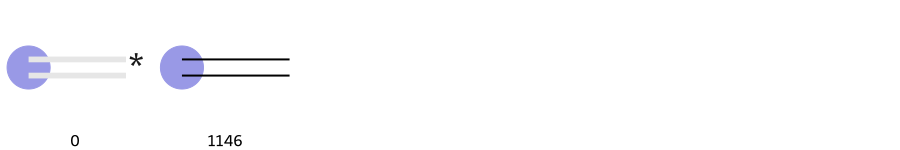

In [83]:
count_bit_info_mol=[]
for i in bit_info_mol_1:
    count_bit_info_mol.append([i, len(bit_info_mol_1[i])])
print(pd.DataFrame(count_bit_info_mol))
img1

      0  1
0     0  2
1  1346  1


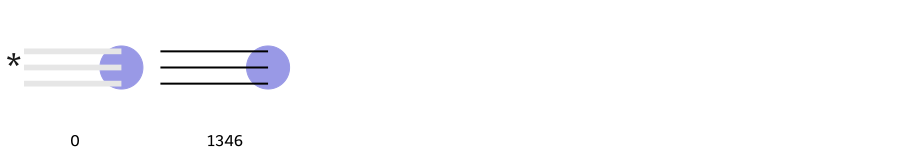

In [84]:
count_bit_info_mol=[]
for i in bit_info_mol_2:
    count_bit_info_mol.append([i, len(bit_info_mol_2[i])])
print(pd.DataFrame(count_bit_info_mol))
img2

       0  1
0      0  8
1     62  1
2    195  2
3    482  1
4    673  3
5    701  1
6    857  3
7    946  1
8   1020  1
9   1146  1
10  1346  1
11  1692  1
12  2012  2


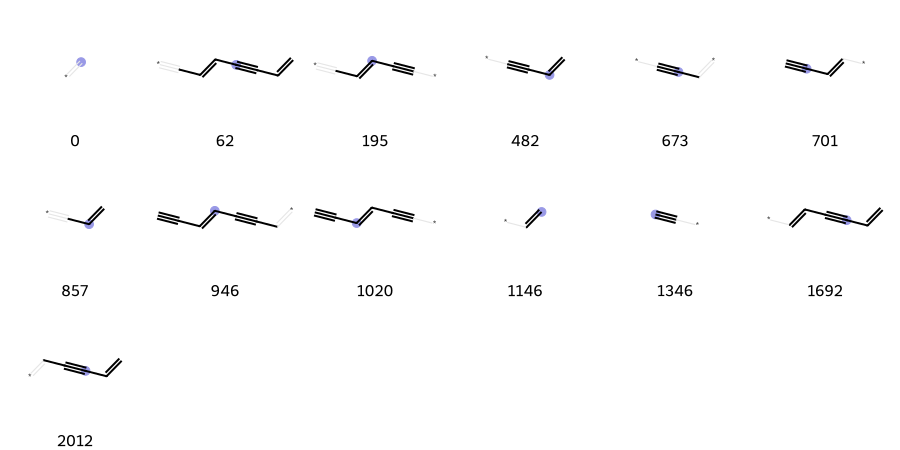

In [85]:
count_bit_info_mol=[]
for i in bit_info_mol_3:
    count_bit_info_mol.append([i, len(bit_info_mol_3[i])])
print(pd.DataFrame(count_bit_info_mol))
img3